# **Clustering -- DBSCAN Algorithm**

## **PHASE OF THE CRISP-DM: BUSINESS UNDERSTANDING**

O problema consiste em agrupar os dados (pontos) com base na sua geolocalização (latitude e longitude) e respeitando as restrições.

Restrição:

1) Distância máxima de 1.6km entre os pontos e seu centróide.

## **PHASE OF THE CRISP-DM: DATA UNDERSTANDING**

Nesta etapa foi realizada a análise exploratória da base. Foi verificado como o dataset é apresentado, suas dimensões e a presença ou não de valores ausentes.

In [8]:
# Importação das bibliotecas
# para os dados
import numpy as np
import pandas as pd
import math

# para a análise geoespacial
import folium

# para machine learning
from sklearn.cluster import DBSCAN

In [9]:
# Leitura dos dados
dtf = pd.read_excel('dataset_geo2.xlsx')
dtf.head(5)

,Latitude,Longitude
0,-7.78417,-34.906820
1,-7.94198,-34.897218
2,-7.57838,-35.032610
3,-7.97718,-34.900890
4,-7.56779,-35.005590


In [10]:
# Verificação das dimensões do dataset
print("Apresentando a dimensão dos dados: {}".format(dtf.shape))

# Verificação dos valores ausentes na base
print("Quantidade de valores ausentes:")
print(dtf.isnull().sum())

Apresentando a dimensão dos dados: (4814, 2)
Quantidade de valores ausentes:
Latitude     0
Longitude    0
dtype: int64


A partir dos dados acima, pode verificar que a base contém 4814 instâncias e 2 atributos. Além disso, a base não tem valores ausentes. 

## **PHASE OF THE CRISP-DM: DATA PREPARATION**

Nesta etapa foi realizada a preparação da base de dados. Assim, os pontos (coordenadas de latitude e longitude) foram plotados no mapa utilizando o pacote folium que permite traçar mapas iterativos.

In [11]:
# Definição das variáveis como a latitude e longitude do dataset
x, y = 'Latitude', 'Longitude'

# Fazendo uma cópia do dataframe
data = dtf.copy()

# Definindo o local de inicialização do mapa como a primeira linha do df
loc = data.iloc[0]

# Inicializa o mapa com o local de partida
map_ = folium.Map(location=loc, tiles='cartodbpositron', zoom_start=11)

# Adiciona um círculo no mapa para cada coordenada de latitude e longitude do dataset
data.apply(lambda row: folium.CircleMarker(location=[row[x],row[y]],fill=True,
                                           popup = folium.Popup(str(['LAT',row[x],'LONG',row[y]]))).add_to(map_), axis=1)

# Plotagem do Mapa
map_

Output hidden; open in https://colab.research.google.com to view.

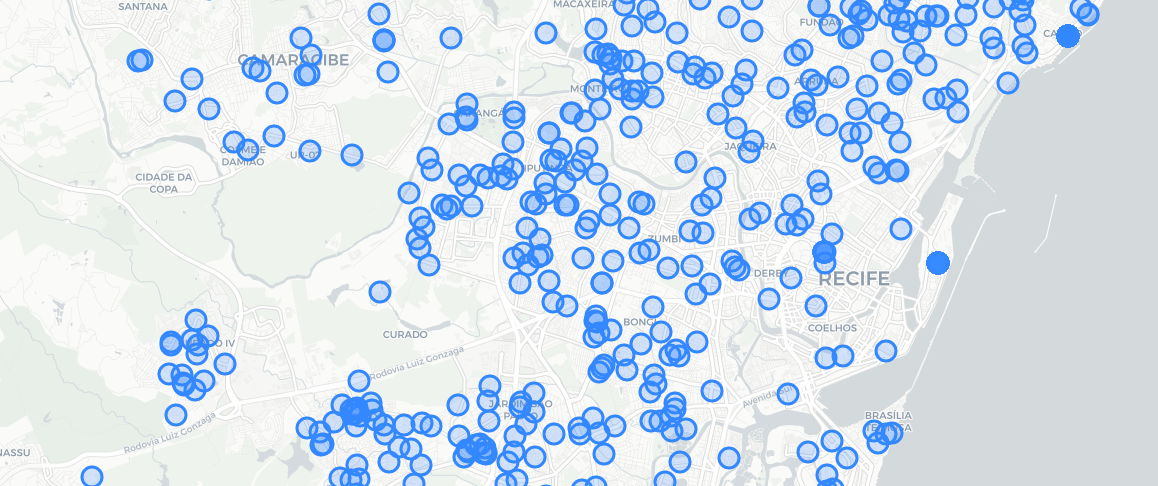

## **PHASE OF THE CRISP-DM: MODELING**

Nesta etapa foi realizado o agrupamento de modo a encontrar os grupos de pontos próximos e seus centróides respeitando a restrição de 1.6km. O algoritmo DBSCAN foi utilizado.

**CLUSTERING - ALGORITMO: DBSCAN**

Este algoritmo é baseado em densidade, é efetivo para identificar clusters de
formato arbitrário e de diferentes tamanhos, além de identificar e separar os ruídos dos dados. Entretanto não é adequado quando a densidade é variável.
Sendo o raio da vizinhança (ε) igual a restrição do problema (1.6km)

In [12]:
# Definindo a distância máxima (em km) -> quanto menor o d, maior é o número de clusters
d=1.6

# Conversão do valor de km para radianos
kms_per_radian = 6371.0088
epsilon = d / kms_per_radian #radius of a neighborhood

# Conversão da latitude e longitude para radiano para uso da métrica haversine
dtf['LatitudeRad']=dtf['Latitude'].apply(lambda row: math.radians(row))
dtf['LongitudeRad']=dtf['Longitude'].apply(lambda row: math.radians(row))

# Fazendo uma cópia do dataframe
dtf_X = dtf[['LatitudeRad','LongitudeRad']]
X = dtf_X.copy()

# Clusterização
model = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine') #haversine dados em radiano
X['Cluster'] = model.fit_predict(X)
num_clusters = len(set(model.labels_))

# Imprimindo informações de quantidade de clusters e labels
print('Número de clusters: {}'.format(num_clusters))
print('Labels: {}'.format(model.labels_))

# Adicionando informações de cluster ao dataset original
dtf[['Cluster']] = X[['Cluster']]
dtf.head(5)

Número de clusters: 41
Labels: [0 0 1 ... 7 0 2]


,Latitude,Longitude,LatitudeRad,LongitudeRad,Cluster
0,-7.78417,-34.906820,-0.135859,-0.609239,0
1,-7.94198,-34.897218,-0.138614,-0.609071,0
2,-7.57838,-35.032610,-0.132268,-0.611434,1
3,-7.97718,-34.900890,-0.139228,-0.609135,0
4,-7.56779,-35.005590,-0.132083,-0.610963,1


In [13]:
# Exibição dos Clusters no mapa
x, y = "Latitude", "Longitude"
color = "Cluster"
data = dtf.copy()

# Definindo a cor dos clusters
lst_elements = sorted(list(dtf[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: lst_colors[lst_elements.index(x)])

# Inicialização do mapa com o local de partida
map_ = folium.Map(location=loc, tiles='cartodbpositron',zoom_start=11)

# Adicionar os pontos da base de dados ao mapa, através da latitude e longitude
data.apply(lambda row: folium.CircleMarker(location=[row[x],row[y]], color=row["color"],
                                           popup = folium.Popup(str(['LAT','LONG',row[x],row[y]])),
                                           fill=True).add_to(map_), axis=1)

# Plota e salva como html
map_.save('clustering_DBSCAN.html')
print("O mapa foi criado. Salvo como clustering_DBSCAN.html.")
map_

Output hidden; open in https://colab.research.google.com to view.

A partir do algoritmo DBSCAN para agrupamento dos pontos, foi gerado o mapa com a visualização dos clusters (separados por cor).

Visualmente, pode-se verificar que os clusters não possuem uma distância de 1.6km entre cada ponto e o centróide do cluster (não existe o conceito de centróide no algoritmo DBSCAN).

Pelo conceito do algoritmo DBSCAN, os clusters são formados pela distância entre os vizinhos próximos. Sendo, portanto, não adequado para dados com densidades variáveis, como no caso deste problema. 
Apesar de possuir a vantagem de não definir anteriormente a quantidade de clusters (o k do algoritmo k-means)


Portanto, não foi possível atender a restrição de distância 1.6km necessária para o problema.

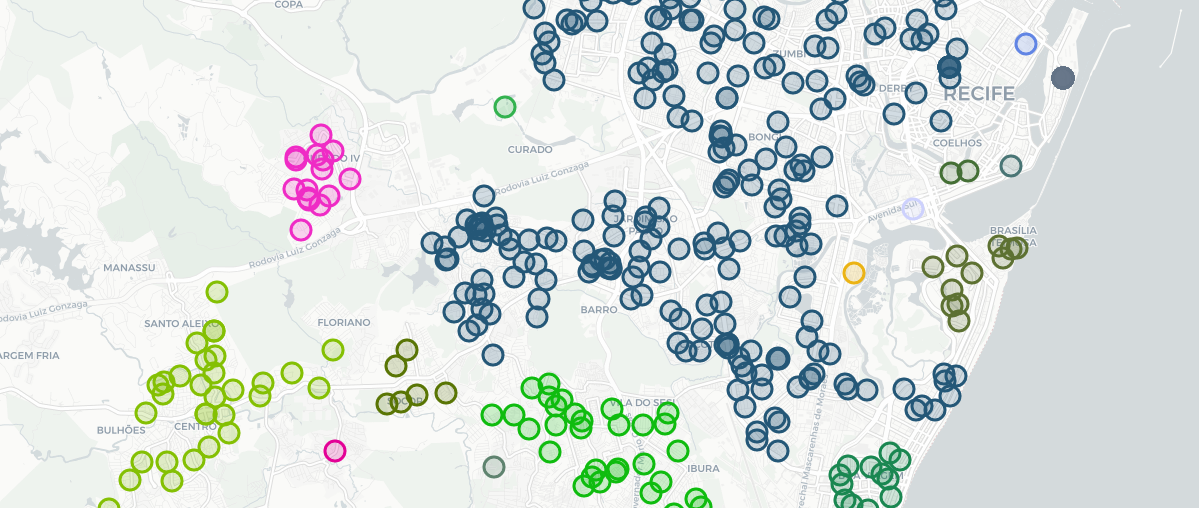